# PCA- Factorial

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore") 
plt.style.use('seaborn')
import factor_analyzer as factor
import missingno as msngo

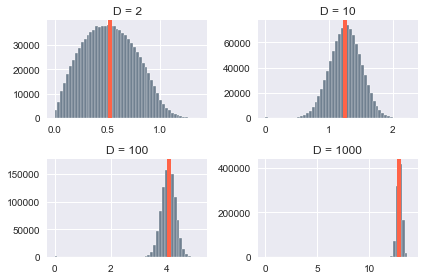

In [2]:
 for i, e in enumerate([2, 10, 100, 1000]): 
    plt.subplot(2,2, i+1) 
    gfx.sim_distance(e)
    plt.tight_layout()

In [27]:
df = pd.read_csv('students.csv', sep='|')

In [28]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [29]:
df_2 = pd.read_csv('income-db.csv')

In [30]:
df_2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [32]:
df_2.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [2]:
df = pd.read_csv('Apoyo Lectura/cep45.csv')

In [4]:
# filtamos las columnas
trust_df = df.filter(regex="p17_*")
trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d': 'Justicia',
'p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros', 'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas', 'p17_m':'Universidades', 'p17_n':'Radio'})

In [11]:
trust_df['Carabineros'].value_counts()

3    584
2    510
1    214
4    167
9     16
8     12
Name: Carabineros, dtype: int64

In [5]:
def fetch_missing(df, missing_vals): 
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2)) 

fetch_missing(trust_df, missing_vals=[8, 9])

I.Catolica 0.03
I.Evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
PartidosPol 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


<Figure size 288x288 with 0 Axes>

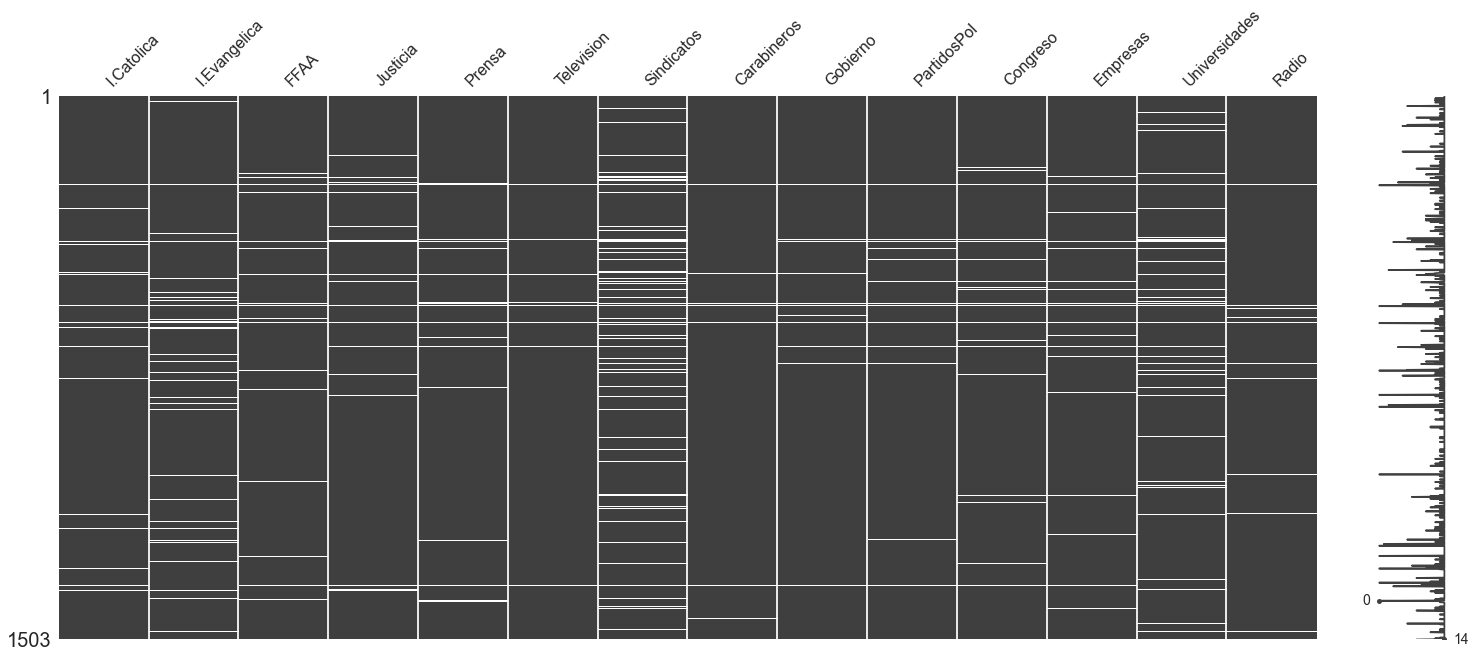

In [6]:
plt.figure(figsize=(4,4)) 
msngo.matrix(trust_df.replace([8, 9], [np.nan, np.nan]));

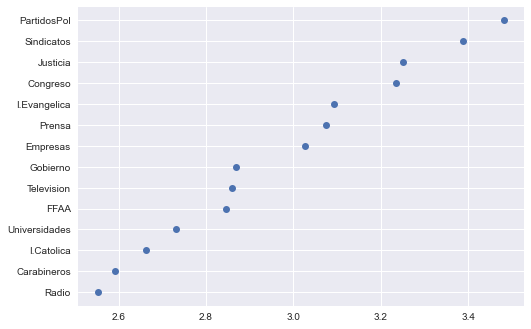

In [7]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable = []
mean = []
# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in trust_df.iteritems(): 
    # guardamos el nombre en variable 
    variable.append(colname)
    # calculamos y procesamos la 
    mean.append(serie.mean())

df_2= pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean']) 
plt.plot(df_2['mean'], df_2['var'],'o')

In [37]:
trust_df.head()

,I.Catolica,I.Evangelica,FFAA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,PartidosPol,Congreso,Empresas,Universidades,Radio
0,2,4,3,2,3,3,3,4,3,3,2,3,2,2
1,2,3,3,3,3,3,2,2,3,4,3,3,3,3
2,4,4,4,4,3,3,4,4,4,4,4,3,4,2
3,1,3,2,2,3,2,3,3,3,4,3,3,3,3
4,3,3,2,1,2,2,1,1,2,3,2,2,2,2


In [32]:
corr = trust_df.corr

# BARLTLET

In [14]:
import factor_analyzer as fact

In [18]:
from factor_analyzer import FactorAnalyzer

In [15]:
fact.calculate_bartlett_sphericity(trust_df)

(6644.835705911947, 0.0)

In [35]:
fact.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.9274657194111268)

In [39]:
eigen_values

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

In [59]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(trust_df)
eigen_values = fa.get_eigenvalues()[0]

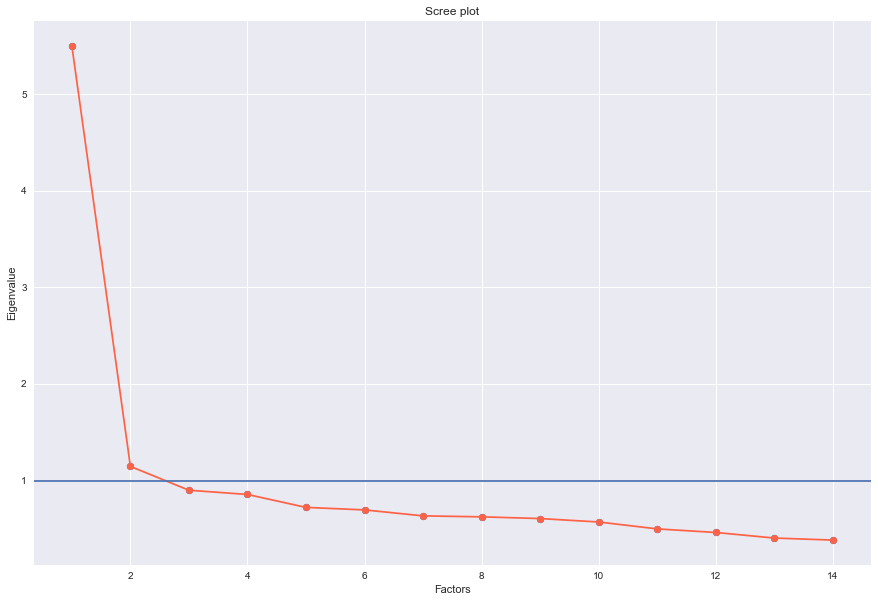

In [51]:
plt.figure(figsize=(15,10))
plt.scatter(range(1,trust_df.shape[1]+1),eigen_values)
plt.plot(range(1,trust_df.shape[1]+1), eigen_values,  'o-', color='tomato')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1)
plt.title("Scree plot")
plt.show()

In [60]:
corr = fa.corr_
corr

array([[1.        , 0.17031673, 0.34226757, 0.31605761, 0.28231047,
        0.3618601 , 0.15944213, 0.3720428 , 0.33311136, 0.29798804,
        0.2490222 , 0.25008475, 0.27177414, 0.31269491],
       [0.17031673, 1.        , 0.25611677, 0.22979405, 0.1762293 ,
        0.26844091, 0.21349602, 0.24639961, 0.24799839, 0.21308939,
        0.17233372, 0.20438921, 0.16132746, 0.23509238],
       [0.34226757, 0.25611677, 1.        , 0.43255826, 0.38176266,
        0.33339098, 0.28453847, 0.44722157, 0.40361629, 0.38491327,
        0.41101863, 0.43830816, 0.35239137, 0.31709397],
       [0.31605761, 0.22979405, 0.43255826, 1.        , 0.34878138,
        0.35475274, 0.33937495, 0.34228945, 0.41835088, 0.44475321,
        0.42019082, 0.37309233, 0.34783384, 0.29500259],
       [0.28231047, 0.1762293 , 0.38176266, 0.34878138, 1.        ,
        0.5355341 , 0.31415699, 0.33196697, 0.42050272, 0.43161284,
        0.39564083, 0.39869551, 0.34685127, 0.39895369],
       [0.3618601 , 0.26844091, 0.3

In [61]:
factor_loadings = fa.loadings_
factor_loadings

array([[0.2115378 , 0.48207631],
       [0.18909242, 0.31556017],
       [0.44635957, 0.4410592 ],
       [0.49501859, 0.36986145],
       [0.39299558, 0.50611705],
       [0.20838918, 0.7000665 ],
       [0.50838434, 0.18316639],
       [0.24972885, 0.5685152 ],
       [0.51311237, 0.45708089],
       [0.66688535, 0.28831161],
       [0.72624282, 0.21479004],
       [0.56733533, 0.31276563],
       [0.44188951, 0.33202866],
       [0.24208804, 0.57256937]])

In [62]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=trust_df.columns)

In [63]:
loadings

,Factor 1,Factor 2
I.Catolica,0.211538,0.482076
I.Evangelica,0.189092,0.315560
FFAA,0.446360,0.441059
Justicia,0.495019,0.369861
Prensa,0.392996,0.506117
Television,0.208389,0.700067
Sindicatos,0.508384,0.183166
Carabineros,0.249729,0.568515
Gobierno,0.513112,0.457081
PartidosPol,0.666885,0.288312


In [64]:
personality_loadings = loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2))) 
personality_loadings

,Factor 1,Factor 2
I.Catolica,,0.48
I.Evangelica,,
FFAA,0.45,0.44
Justicia,0.5,
Prensa,,0.51
Television,,0.7
Sindicatos,0.51,
Carabineros,,0.57
Gobierno,0.51,0.46
PartidosPol,0.67,


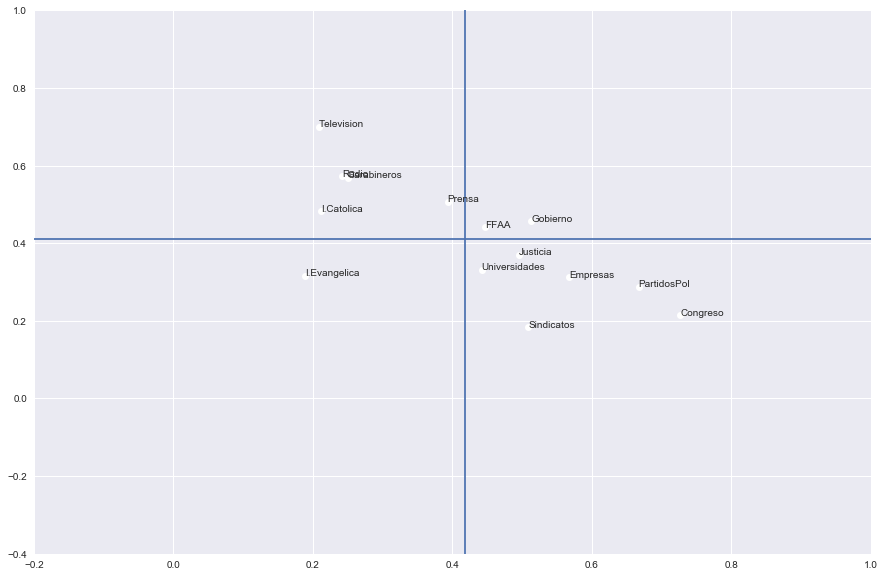

In [32]:
# guardemos la varianza explicada por cada dimensión
factor_var = fa.get_factor_variance()
# cruzamos ambos factores
plt.figure(figsize=(15,10))
plt.plot(loadings['Factor 1'], loadings['Factor 2'],'o',color='white') 
plt.xlim((-.2,1)) # definimos límites
plt.ylim((-.4, 1))
# Para cada elemento en los factores
for i, txt in enumerate(loadings.index):
    # anotemos el nombre de la variable 
    plt.annotate(txt, (loadings['Factor 1'][i],loadings['Factor 2'][i]))
# Grafiquemos la media de ambos factores
plt.axvline(loadings['Factor 1'].mean())
plt.axhline(loadings['Factor 2'].mean())
# Reportemos la varianza de cada dimensión
#plt.xlabel('Factor 1: {}'.format(round(factor_var['Factor 1'][1], 2))) 3
#plt.ylabel('Factor 2: {}'.format(round(factor_var['Factor 2'][1], 2)))

,Factor 1,Factor 2
I.Catolica,,0.48
I.Evangelica,,
FFAA,0.45,0.44
Justicia,0.5,
Prensa,,0.51
Television,,0.7
Sindicatos,0.51,
Carabineros,,0.57
Gobierno,0.51,0.46
PartidosPol,0.67,


In [26]:
corr = pd.DataFrame(fa.corr_)

In [27]:
corr = pd.DataFrame(fa.transform(trust_df), columns=['Factor 1', 'Factor 2'])

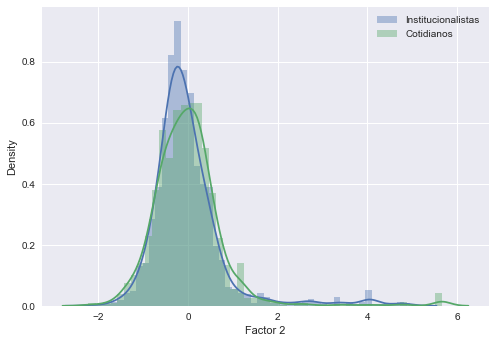

In [28]:
sns.distplot(corr.loc[:, 'Factor 1'], label="Institucionalistas") 
sns.distplot(corr.loc[:, 'Factor 2'], label="Cotidianos") 
plt.legend()

In [36]:
factor_var = fa.get_factor_variance() 
factor_var

(array([2.8546665 , 2.64039588]),
 array([0.20390475, 0.18859971]),
 array([0.20390475, 0.39250446]))